Exploratory Data Analysis --> Factors and Symptoms Related to Heart Disease.

Disclaimer : Not all factors and symptoms are listed, just a summary

Heart Disease ---> Patient A

No Heart Disease ---> Patient B

Objectives ;

1.What is the average BMI for both patients ?

2.Which Age Group is more sensitive to Heart Disease ?

3.What is the average , maximum and minimum sleep time for both patients ?

4.What is the General Health for both patients ?

5.How is Physical Activity distributed among both patients ?

6.How is the gender distributed among both patients ?

7.How is race distributed among both patients ?

8.Which symptom is more prevalent among both patients ?

Overall Goal : Which factor mainly contributes to Heart Disease ?

Session 1 : Import Libraries and Load Data

In [1]:
import pandas as pd  
pd.set_option('display.max_rows',500)
import numpy as np               
import matplotlib.pyplot as plt              
import seaborn as sns        
%matplotlib inline         
import warnings 
warnings.filterwarnings('ignore')

In [2]:
heart=pd.read_csv('heart.csv')

Session 2 : Basic Data Exploration

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   DiffWalking       319795 non-null  object 
 6   Sex               319795 non-null  object 
 7   AgeCategory       319795 non-null  object 
 8   Race              319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  int64  
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(1), int64

In [4]:
heart.describe()

,BMI,SleepTime
count,319795.000000,319795.000000
mean,28.325399,7.097075
std,6.356100,1.436007
min,12.020000,1.000000
25%,24.030000,6.000000
50%,27.340000,7.000000
75%,31.420000,8.000000
max,94.850000,24.000000


In [5]:
heart.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [6]:
heart.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
heart.duplicated().sum()

39110

In [8]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


Session 3 : Data Cleaning

In [9]:
heart['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [10]:
heart.replace({
    'AgeCategory':'80 or older'
},'80-100',inplace=True)

In [11]:
heart.drop_duplicates(inplace=True)
heart.duplicated().sum()

0

In [12]:
heart.shape

(280685, 16)

Session 4 : Problem Solving

1.What is the average BMI for both patients ?

In [13]:
patient_a=heart.query('HeartDisease == "Yes"')['BMI'].median()
patient_b=heart.query('HeartDisease == "No"')['BMI'].median()
print(f'Patient A : {patient_a}\nPatient B : {patient_b}')

Patient A : 28.34
Patient B : 27.44


2.What is the average , maximum and minimum sleep time for both patients ?

i) Patient A

In [52]:
average_A=heart.query('HeartDisease == "Yes"')['SleepTime'].median()
max_A=heart.query('HeartDisease == "Yes"')['SleepTime'].max()
min_A=heart.query('HeartDisease == "Yes"')['SleepTime'].min()
print(f'Average SleepTime : {average_A}\nMaximum SleepTime : {max_A}\nMinimum SleepTime : {min_A}')

Average SleepTime : 7.0
Maximum SleepTime : 24
Minimum SleepTime : 1


ii) Patient B

In [15]:
average_B=heart.query('HeartDisease == "No"')['SleepTime'].median()
max_B=heart.query('HeartDisease == "No"')['SleepTime'].max()
min_B=heart.query('HeartDisease == "No"')['SleepTime'].min()
print(f'Average SleepTime : {average_B}\nMaximum SleepTime : {max_B}\nMinimum SleepTime : {min_B}')

Average SleepTime : 7.0
Maximum SleepTime : 24
Minimum SleepTime : 1


3.Which Age Group is more sensitive to Heart Disease ?

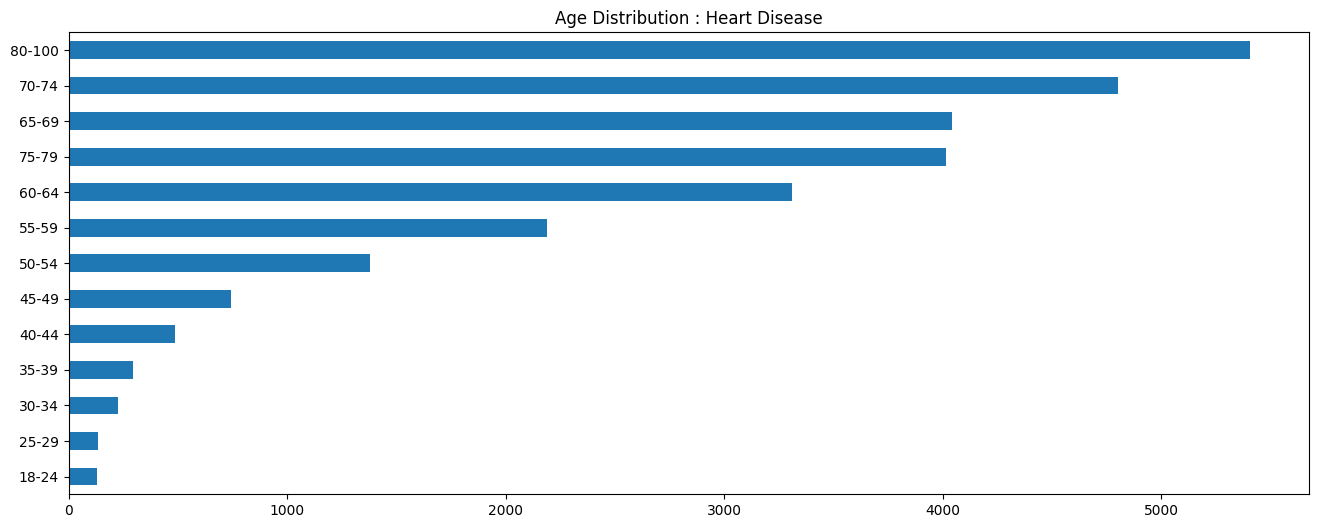

In [16]:
plt.figure(figsize=(16,6))
heart.query('HeartDisease == "Yes"')['AgeCategory'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Age Distribution : Heart Disease')
plt.xticks(rotation=360)
plt.show()

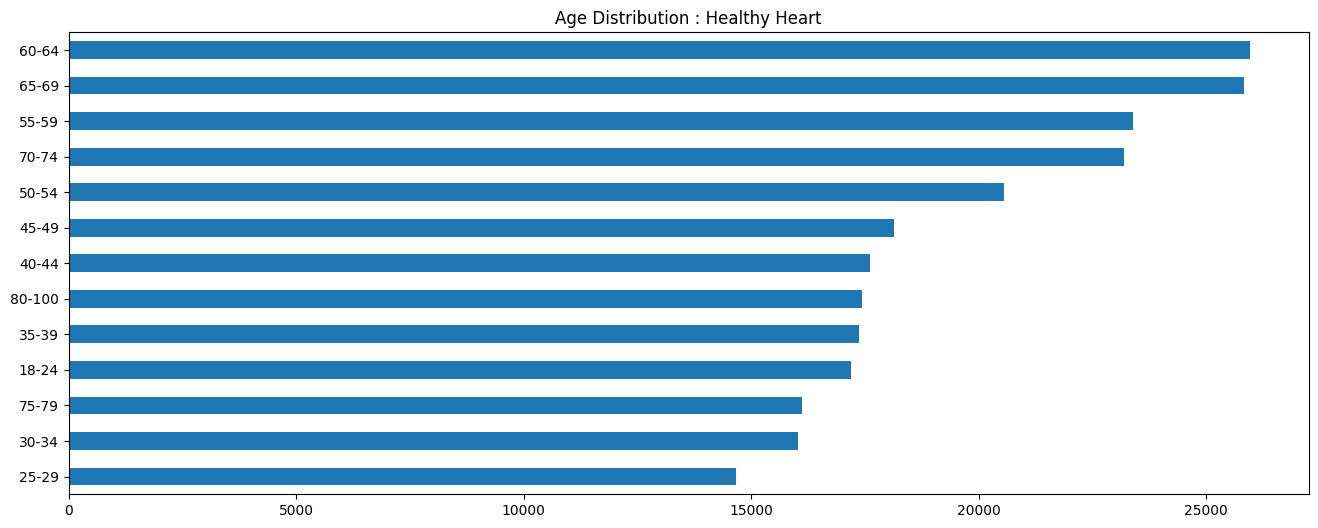

In [17]:
plt.figure(figsize=(16,6))
heart.query('HeartDisease == "No"')['AgeCategory'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Age Distribution : Healthy Heart')
plt.xticks(rotation=360)
plt.show()

4.What is the General Health for both patients ?

In [18]:
heart.groupby('HeartDisease')['GenHealth'].value_counts()

HeartDisease  GenHealth
No            Very good    88010
              Good         77924
              Excellent    52748
              Fair         27422
              Poor          7429
Yes           Good          9442
              Fair          7071
              Very good     5297
              Poor          3849
              Excellent     1493
Name: GenHealth, dtype: int64

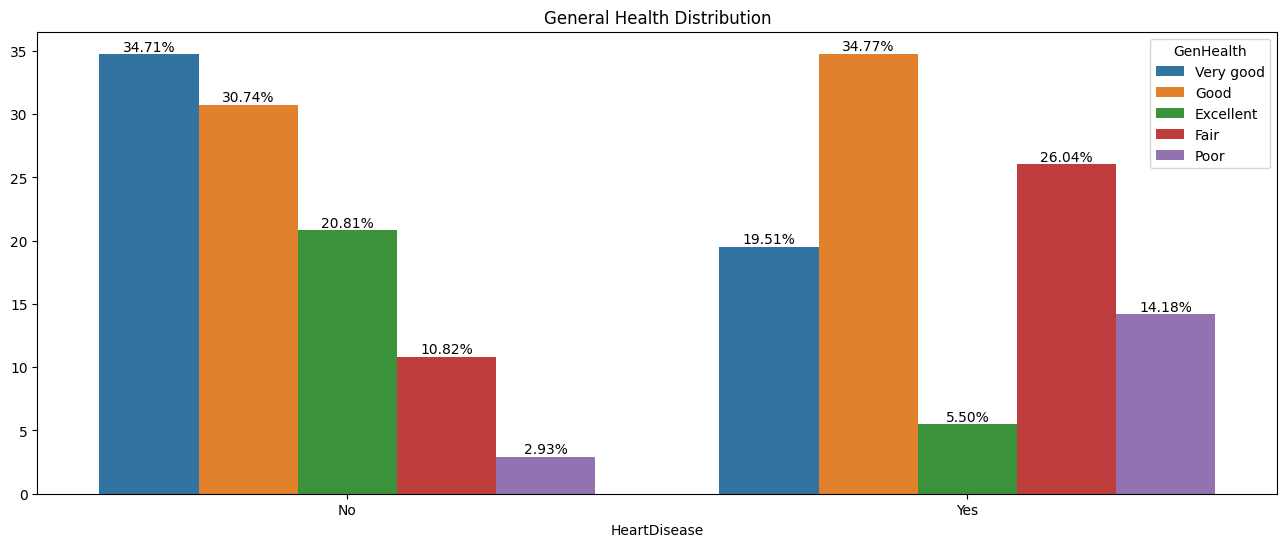

In [19]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['GenHealth'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['GenHealth'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['GenHealth'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('General Health Distribution')
plt.show()

The skewness is to the right for patients who have no heart disease.

5.How is Physical Activity distributed among both patients ?

In [20]:
heart.groupby('HeartDisease')['PhysicalActivity'].value_counts()

HeartDisease  PhysicalActivity
No            Yes                 192850
              No                   60683
Yes           Yes                  17285
              No                    9867
Name: PhysicalActivity, dtype: int64

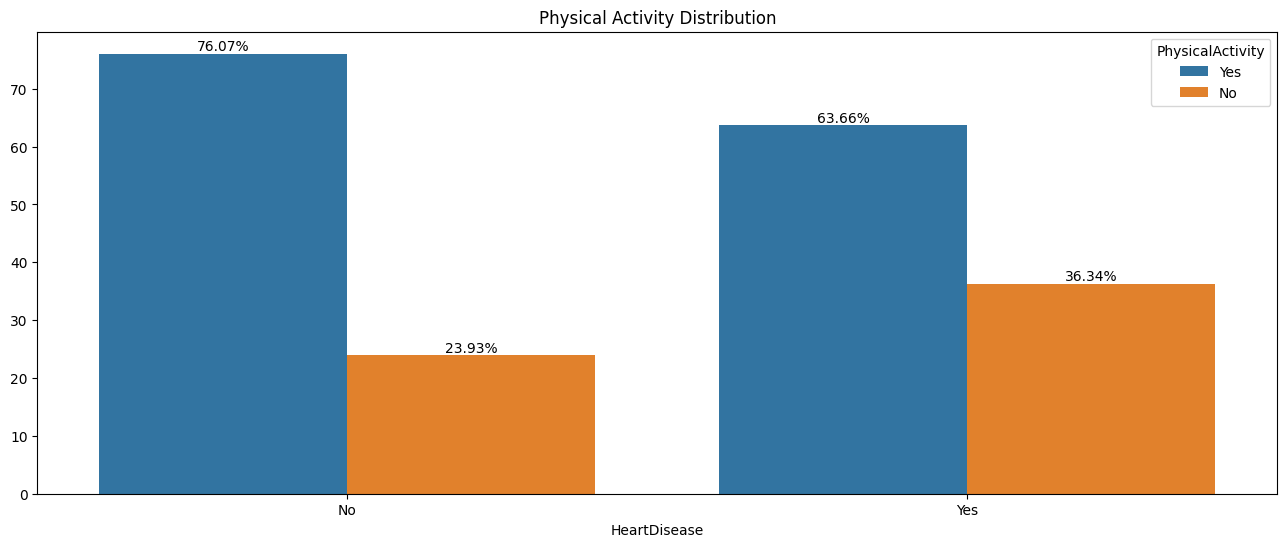

In [21]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['PhysicalActivity'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['PhysicalActivity'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['PhysicalActivity'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Physical Activity Distribution')
plt.show()

6.How is the gender distributed among both patients ?

In [22]:
heart.groupby('HeartDisease')['Sex'].value_counts()

HeartDisease  Sex   
No            Female    136756
              Male      116777
Yes           Male       15967
              Female     11185
Name: Sex, dtype: int64

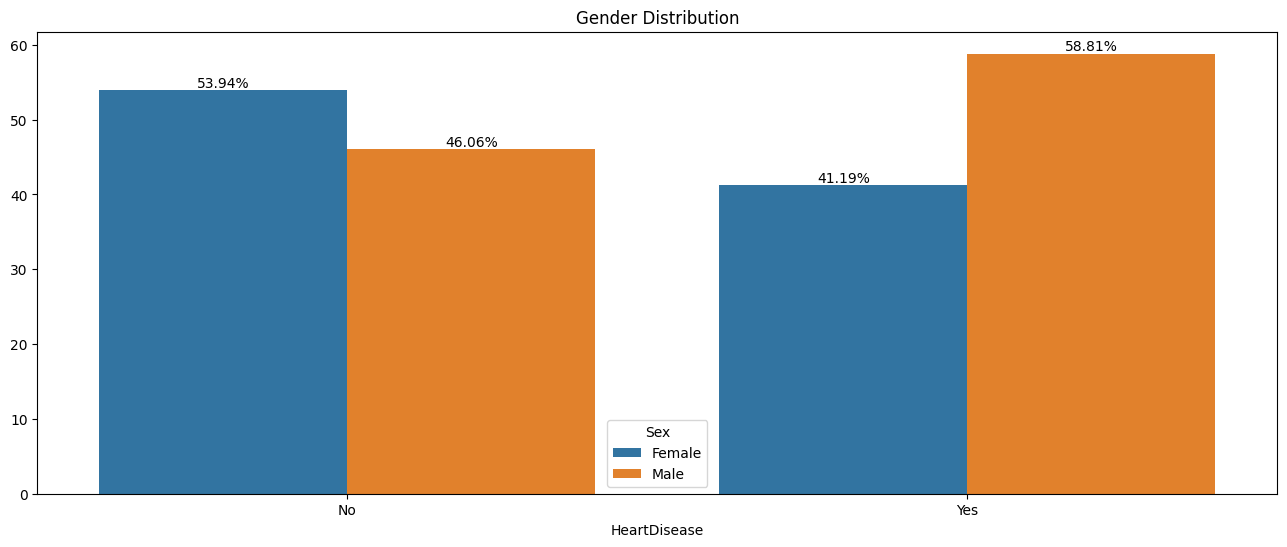

In [23]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['Sex'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['Sex'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['Sex'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Gender Distribution')
plt.show()

7.How is race distributed among both patients ?

In [24]:
heart.groupby('HeartDisease')['Race'].value_counts()

HeartDisease  Race                          
No            White                             185292
              Hispanic                           25155
              Black                              20899
              Other                               9939
              Asian                               7608
              American Indian/Alaskan Native      4640
Yes           White                              22289
              Black                               1728
              Hispanic                            1441
              Other                                886
              American Indian/Alaskan Native       542
              Asian                                266
Name: Race, dtype: int64

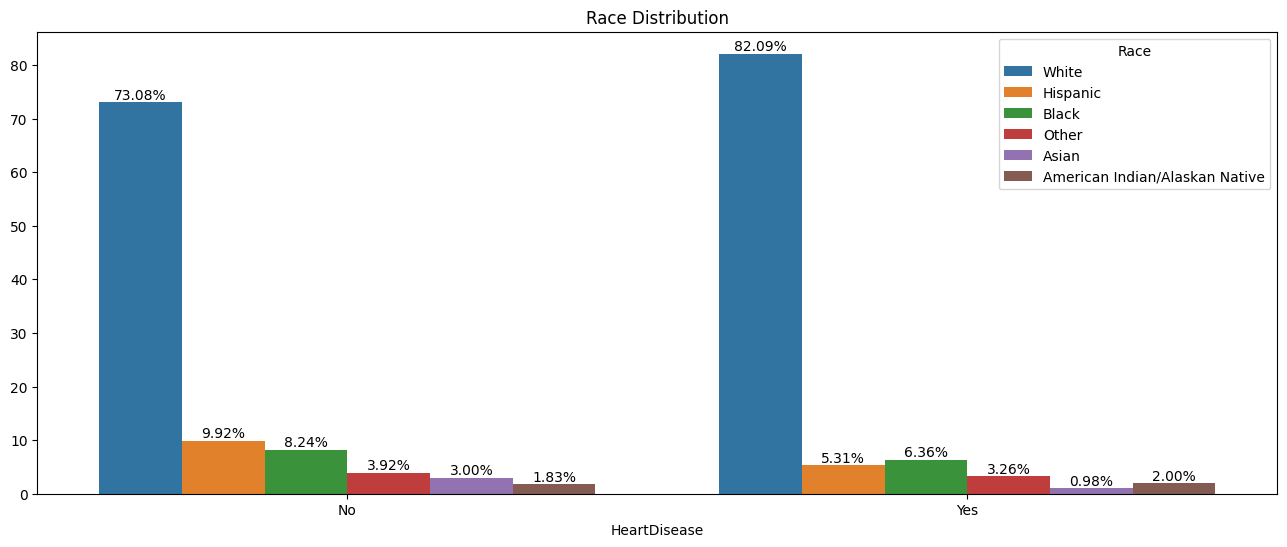

In [25]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['Race'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['Race'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['Race'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')
    
plt.title('Race Distribution')
plt.show()

7.Which symptom is more prevalent in Heart Disease Patients ?

i) Stroke

In [26]:
heart.groupby('HeartDisease')['Stroke'].value_counts()

HeartDisease  Stroke
No            No        245866
              Yes         7667
Yes           No         22763
              Yes         4389
Name: Stroke, dtype: int64

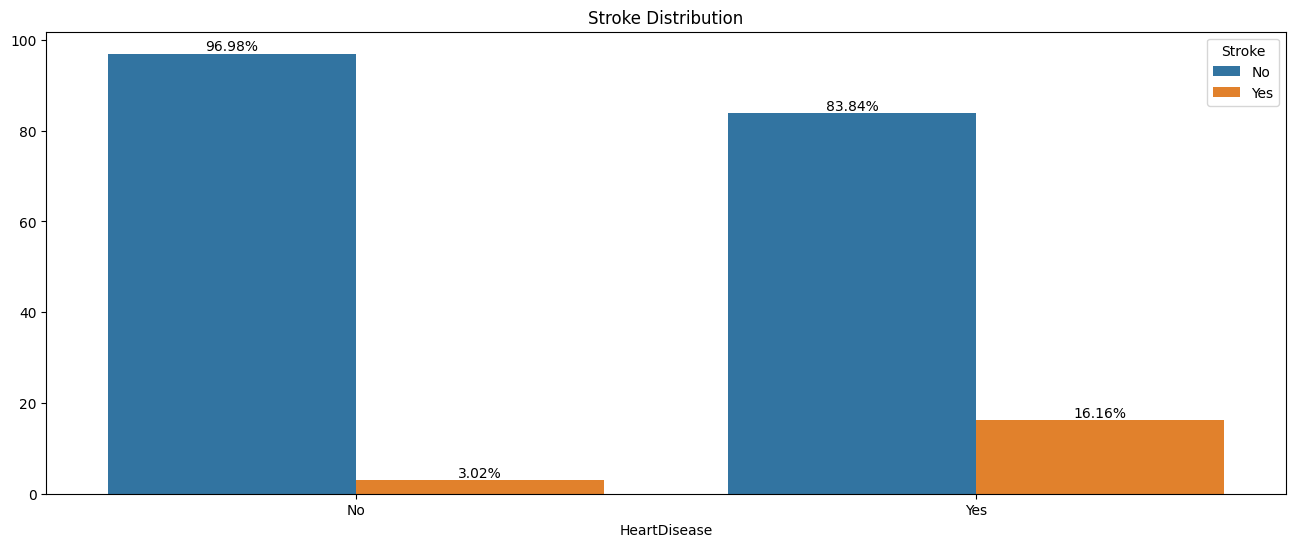

In [27]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['Stroke'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['Stroke'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['Stroke'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Stroke Distribution')
plt.show()

In [28]:
heart.groupby('HeartDisease')['DiffWalking'].value_counts()

HeartDisease  DiffWalking
No            No             219352
              Yes             34181
Yes           No              17141
              Yes             10011
Name: DiffWalking, dtype: int64

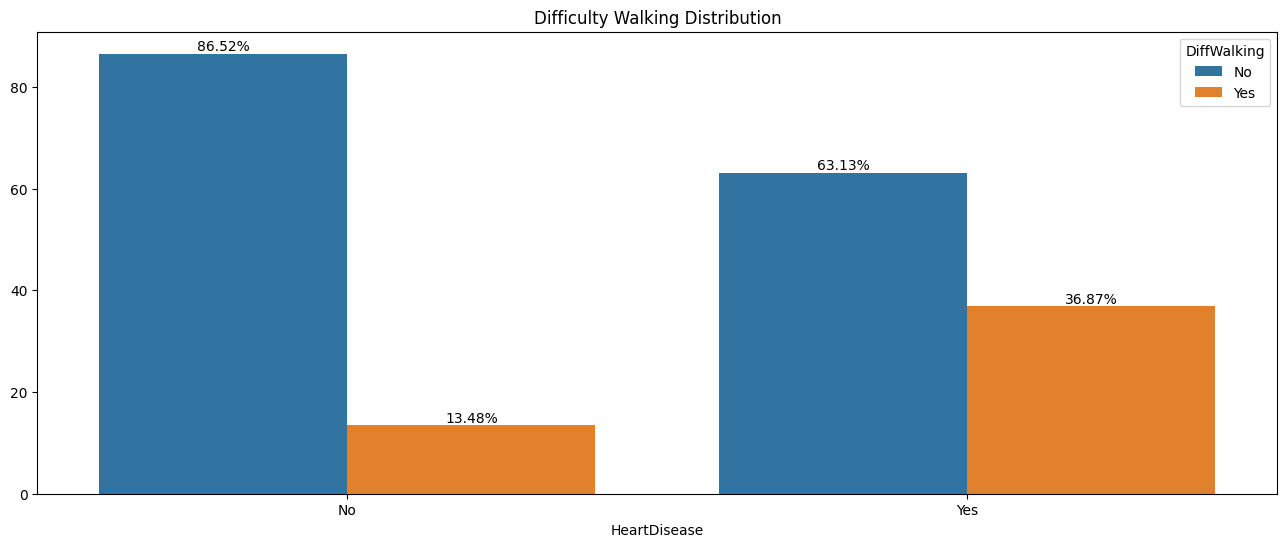

In [29]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['DiffWalking'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['DiffWalking'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['DiffWalking'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Difficulty Walking Distribution')
plt.show()

Difficulty Walking is more prevalent with a percentage of 37% while Strokes with a percentage of 16% are more less likely to occur.

8.Which factor/behaviour mainly causes Heart Disease ?

i) Smoking

In [35]:
heart.groupby('HeartDisease')['Smoking'].value_counts()

HeartDisease  Smoking
No            No         147558
              Yes        105975
Yes           Yes         15907
              No          11245
Name: Smoking, dtype: int64

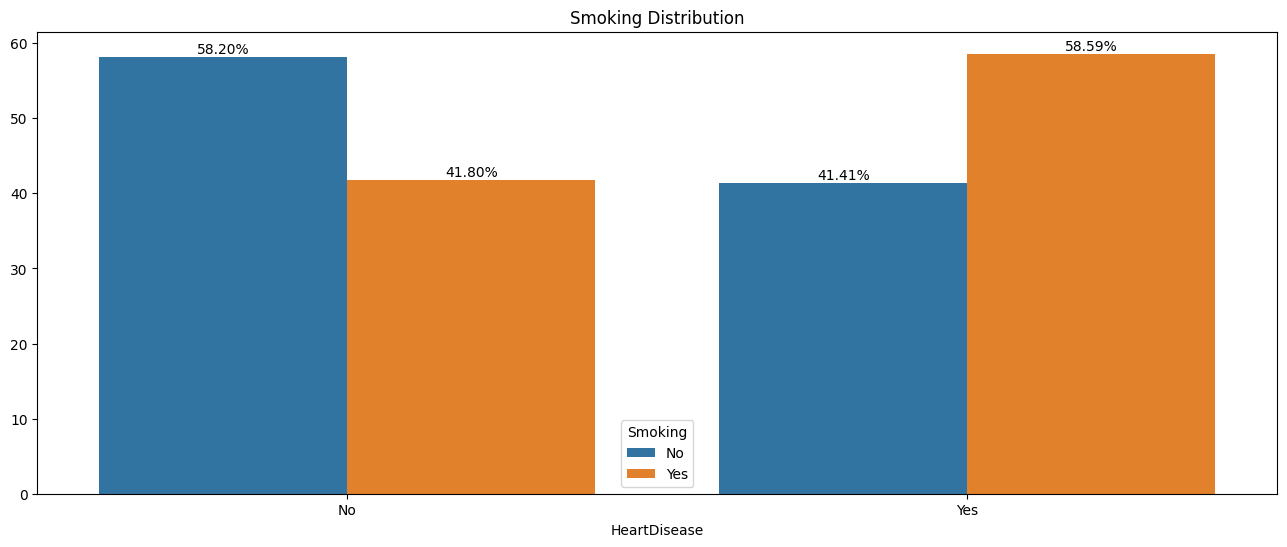

In [36]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['Smoking'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['Smoking'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['Smoking'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Smoking Distribution')
plt.show()

More than 50% of heart disease patients are smokers.

ii) Alcoholic

In [37]:
heart.groupby('HeartDisease')['AlcoholDrinking'].value_counts()

HeartDisease  AlcoholDrinking
No            No                 233465
              Yes                 20068
Yes           No                  26011
              Yes                  1141
Name: AlcoholDrinking, dtype: int64

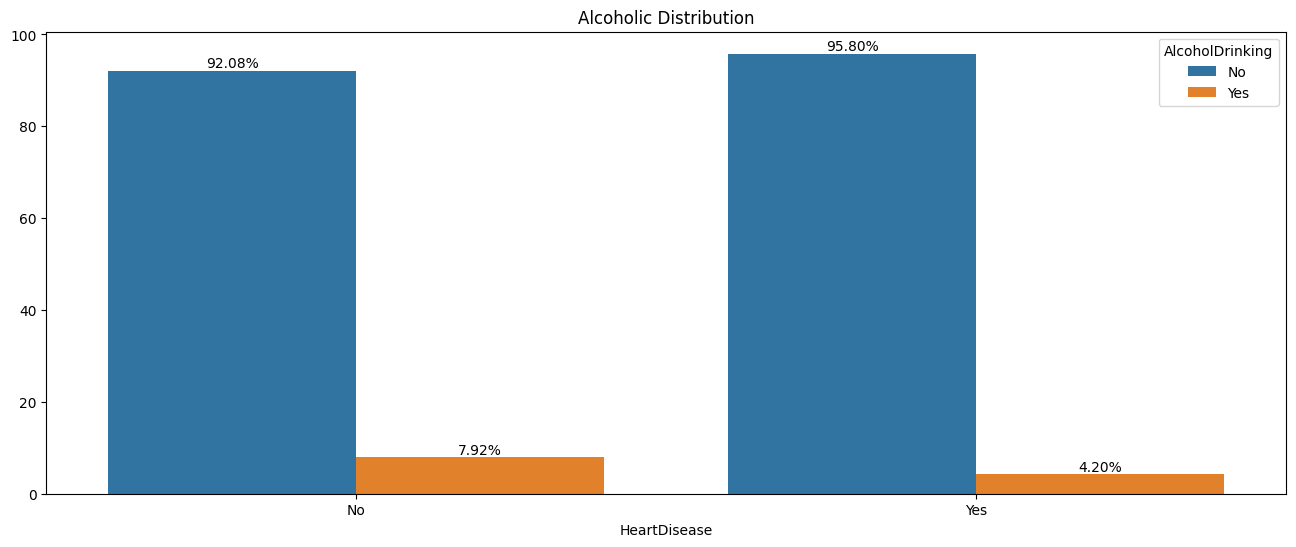

In [38]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['AlcoholDrinking'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['AlcoholDrinking'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['AlcoholDrinking'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Alcoholic Distribution')
plt.show()

Less than 5% of Heart Disease patients are alcoholics.

iii) Diabetic

In [40]:
heart.groupby('HeartDisease')['Diabetic'].value_counts()

HeartDisease  Diabetic               
No            No                         213685
              Yes                         31432
              No, borderline diabetes      5981
              Yes (during pregnancy)       2435
Yes           No                          17323
              Yes                          8932
              No, borderline diabetes       789
              Yes (during pregnancy)        108
Name: Diabetic, dtype: int64

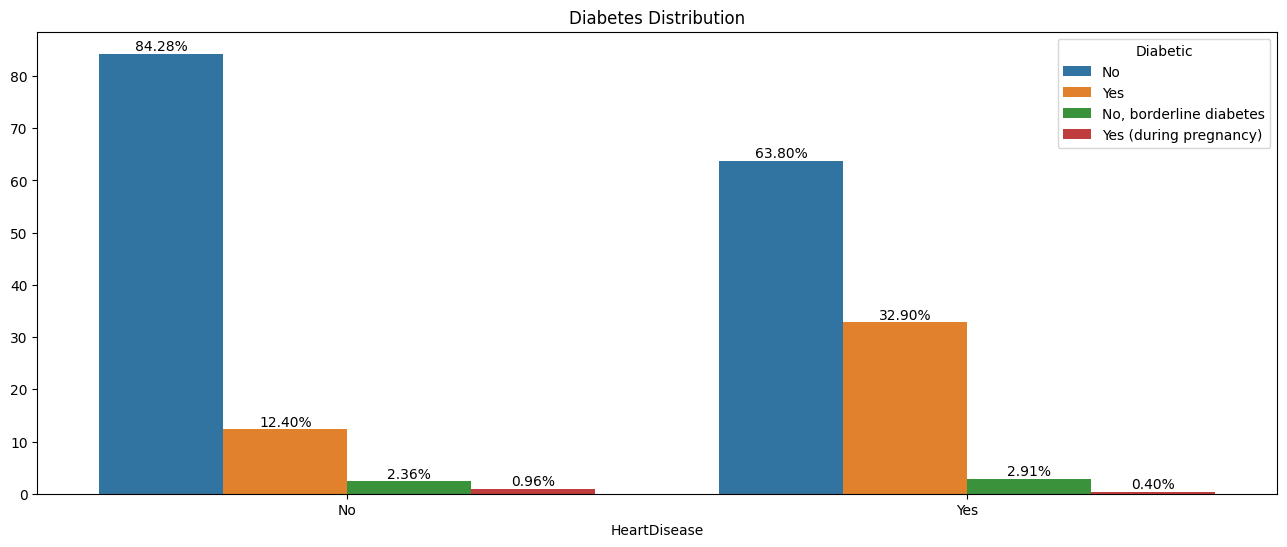

In [41]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['Diabetic'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['Diabetic'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['Diabetic'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Diabetes Distribution')
plt.show()

Non-Diabetic's take the lead with 64% followed by Diabetic's with 33%.

iv) Asthmatic

In [42]:
heart.groupby('HeartDisease')['Asthma'].value_counts()

HeartDisease  Asthma
No            No        216509
              Yes        37024
Yes           No         22224
              Yes         4928
Name: Asthma, dtype: int64

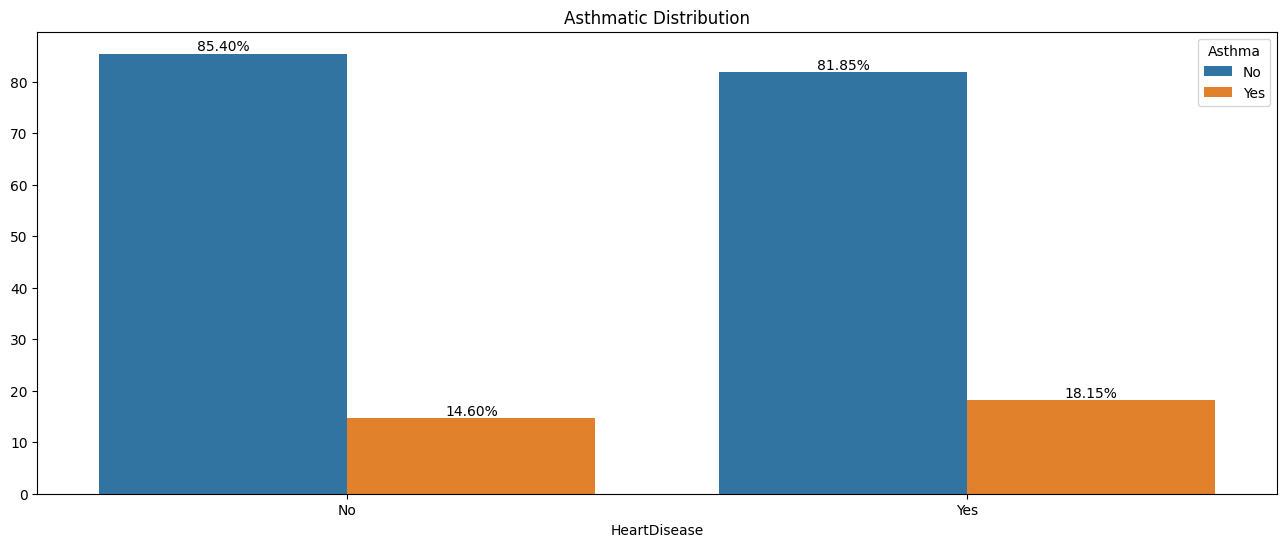

In [43]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['Asthma'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['Asthma'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['Asthma'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Asthmatic Distribution')
plt.show()

Only 18% of Asthmatics are heart disease patients.

v) Kidney Disease

In [44]:
heart.groupby('HeartDisease')['KidneyDisease'].value_counts()

HeartDisease  KidneyDisease
No            No               245222
              Yes                8311
Yes           No                23699
              Yes                3453
Name: KidneyDisease, dtype: int64

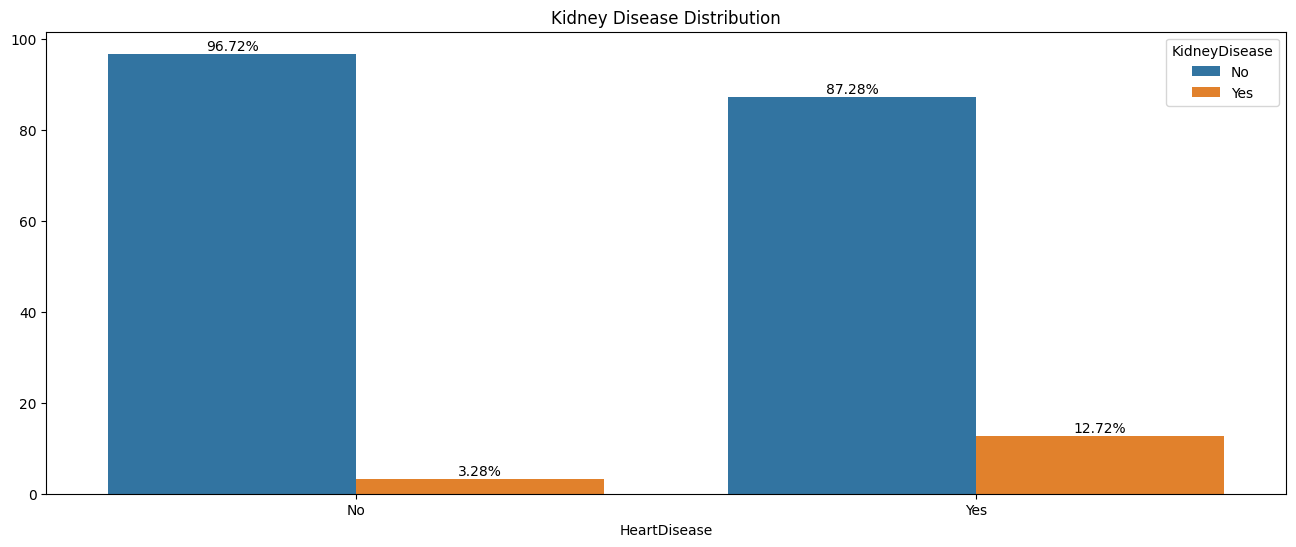

In [45]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['KidneyDisease'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['KidneyDisease'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['KidneyDisease'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Kidney Disease Distribution')
plt.show()

Less than 15% of Kidney Disease patients have heart disease.

vi) Skin Cancer

In [49]:
heart.groupby('HeartDisease')['SkinCancer'].value_counts()

HeartDisease  SkinCancer
No            No            229735
              Yes            23798
Yes           No             22194
              Yes             4958
Name: SkinCancer, dtype: int64

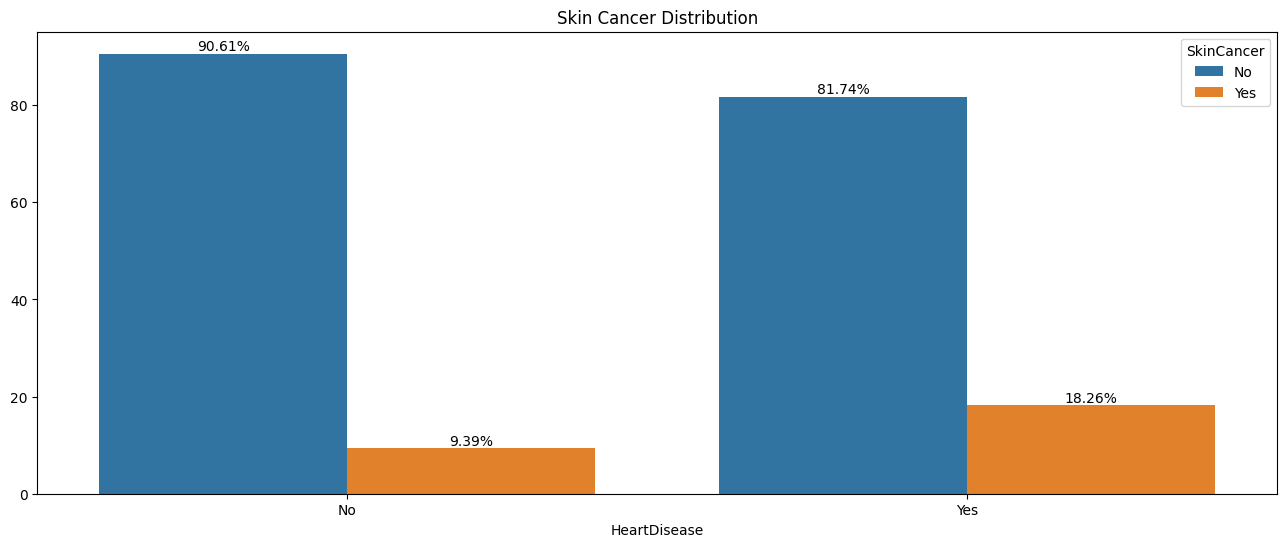

In [50]:
plt.figure(figsize=(16,6))
ax=sns.barplot(
    x=(heart.groupby('HeartDisease')['SkinCancer'].value_counts(normalize=True)*100).index.get_level_values(0),
    y=(heart.groupby('HeartDisease')['SkinCancer'].value_counts(normalize=True)*100).values,
    hue=(heart.groupby('HeartDisease')['SkinCancer'].value_counts(normalize=True)*100).index.get_level_values(1)
)
for a in ax.containers:  
    plt.bar_label(a,fmt='%.2f%%')

plt.title('Skin Cancer Distribution')
plt.show()

Skin Cancer patients occupy 18% of the total heart disease patients.

Overall Assumption : 60% of Heart Disease Patients are Smokers.